In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
from tqdm import tqdm
import glob
import re
%matplotlib inline

In [2]:
import glyphy as gly

## Dataset

In [3]:
files = glob.glob("datasets/happiness/*.csv")
years = list(re.split("[\\\/]", f)[-1].split(".")[0] for f in files)
data = pd.concat([pd.read_csv(x).assign(Year=y) for y, x in zip(years[:-1], files[:-1])]).reset_index(drop=True)
cols = data.columns.tolist()

    for i, row in tqdm(data.iterrows(), position=0):
        if row['Region'] is np.nan:
            # fill it with something.
            for j, row2 in data.iterrows():
                if (row2['Country'] == row['Country']) and (row2['Region'] is not np.nan):
                    data.at[i, "Region"] = row2['Region']
                    continue

In [4]:
bar_data = data.pivot_table(index='Year', columns='Country', values='Happiness Score').iloc[:, 5:15]

# Pie demo

Pie charts require a pandas.Dataframe where rows represent time, and columns are a category of interest (as labelled by the column name).

Values that are close to 0 as a proportion have their label removed per frame.

In [5]:
gly.Pie(bar_data).plot(5)

<AxesSubplot:>

We can linearly interpolate over the data to get smooth growth and shrinking of pie slices.

In [6]:
gly.Pie(bar_data).lerp().plot(5)

<AxesSubplot:>

### Labelling the wedges

In [7]:
gly.Pie(bar_data).mark(annot=True).lerp().plot(5)

<AxesSubplot:>

### Setting the pie chart width, for Donut plot

In [8]:
gly.Pie(bar_data).mark(width=.7).lerp().plot(3)

<AxesSubplot:>

In [9]:
gly.Pie(bar_data).mark(width=.5, annot=True).plot(3)

<AxesSubplot:>

### Pies with colormaps

In [10]:
gly.Pie(bar_data).mark(cmap="Greens").lerp().plot(5)

<AxesSubplot:>

Specify the minimum and maximum of the colormap, along with some shading.

In [11]:
gly.Pie(bar_data).mark(cmap="Reds", vmin=.2, vmax=.8, shade=True).plot(5)

<AxesSubplot:>

### Custom colors for groups of countries

Alternatively a list of colors corresponding to each country can be provided for custom grouping.

By default, line width is drawn to differentiate when the same color is next to another.

In [12]:
bar_data_colors = ['b','g','b','b','r','black','b','b','orange','yellow']
gly.Pie(bar_data).mark(c=bar_data_colors).plot(5)

<AxesSubplot:>

## Explosion

In [13]:
gly.Pie(bar_data).mark(cmap="Greens", explode="Azerbaijan").lerp().plot(5)

<AxesSubplot:>

# Bar1d demonstration



## Bar1D



In [14]:
gly.Bar(bar_data).plot()

<AxesSubplot:>

### Horizontal bar

With added variation in colours either as string, number or numpy array.

In [15]:
colors = ['r','g','b','purple','orange','yellow','magenta','maroon','black','cyan']
gly.Bar(bar_data).mark(orient="horz", c=colors).plot()

<AxesSubplot:>

In [16]:
cm_array = plt.cm.get_cmap("viridis")(np.linspace(.2, .8, 10))
gly.Bar(bar_data).mark(orient="horz", c=cm_array).plot()

<AxesSubplot:>

### Use of colormap

If a colour map is provided, it will compute colours for each bar (as in previous example) and override the base color `c`.

In [17]:
gly.Bar(bar_data).mark(orient="horz", c='r', cmap="RdBu").plot()

<AxesSubplot:>

### Line widths and colour

By default there is no edge thickness.

In [18]:
gly.Bar(bar_data).mark(orient="horz", lw=2, ec='r').plot()

<AxesSubplot:>

### Bar thickness

In [19]:
gly.Bar(bar_data).mark(orient="horz", thick=.5).plot()

<AxesSubplot:>

### Linear interpolation

In [20]:
gly.Bar(bar_data.dropna(axis=1)).mark(orient="horz").lerp(6).plot(4)

<AxesSubplot:>

### Bar hatch styles

We provide support to a number of styles to give to the barplots

In [21]:
gly.Bar(bar_data).mark(orient="horz",hatch="/",c='r').plot()

<AxesSubplot:>

In [22]:
gly.Bar(bar_data).mark(orient="horz",hatch="x",c='g').plot()

<AxesSubplot:>

In [23]:
gly.Bar(bar_data).mark(orient="horz", hatch="O", fill=False, ec='k').plot()

<AxesSubplot:>

# Grouped bar plot (via long form)

We may want more sophisticated plots where our data is in long form. In this case `x` and `y` MUST be specified in `mark()`.

One of the advantages of this approach is the axis are always labelled properly.

In [24]:
data2 = pd.DataFrame({'labels': np.tile(['G1', 'G2', 'G3', 'G4', 'G5'], 10),
              'men': np.random.choice(np.arange(20, 38, 1), size=50),
              'women': np.random.choice(np.arange(22, 36, 1), size=50)})
data2.head()

,labels,men,women
0,G1,32,26
1,G2,34,32
2,G3,32,34
3,G4,32,25
4,G5,26,29


In [25]:
sex_data = data2.melt('labels', var_name='sex', value_name='means')

### Handling the non-hue case

In this simple example we ignore the sex label and just plot the labels and means.

In [26]:
gly.Bar(sex_data, long=True).mark(x='labels', y='means').plot(3)

<AxesSubplot:xlabel='labels', ylabel='means'>

In [27]:
gly.Bar(sex_data, long=True).mark(x='labels', y='means', c=['r','g','b','cyan','gray']).plot(2)

<AxesSubplot:xlabel='labels', ylabel='means'>

### Introducing hue

In [28]:
gly.Bar(sex_data, long=True).mark(x='labels', y='means', orient='horz', hue='sex').plot(2)

<AxesSubplot:xlabel='labels', ylabel='means'>

### Colormaps correspond to hue

In [29]:
gly.Bar(sex_data, long=True).mark(x='labels', orient='horz',
                                  y='means', hue='sex', cmap="bwr").plot(2)

<AxesSubplot:xlabel='labels', ylabel='means'>

In [30]:
gly.Bar(sex_data, long=True).mark(x='labels', y='means', hue='sex', lw=2, ec='b').plot(2)

<AxesSubplot:xlabel='labels', ylabel='means'>

### Using lerp for beautiful transitions

In [38]:
def detick(fig, ax):
    ax.set_xticks([])
    ax.set_yticks([])

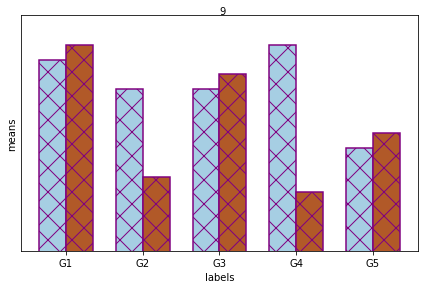

In [40]:
gl = gly.Bar(sex_data, long=True).mark(x='labels', y='means', hatch='x', hue='sex', lw=1.5, ec='purple', cmap="Paired").callback(detick).lerp(10)
gl.time_seconds = 10
gl.save("gifs/bar1.gif")

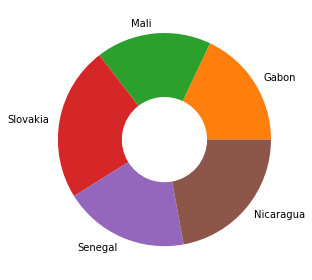

In [58]:
data2 = data.pivot_table(index='Year', columns='Country', values='Happiness Score').sample(6, replace=False, axis=1)
gl2 = gly.Pie(data2).mark(width=.6).lerp()
gl2.time_seconds = 5
gl2.save("gifs/pie1.gif")